# Master equation approach to constitutive gene expression

This exercise was generated from a Jupyter notebook. You can download the notebook [here](gene_expression_master_equation_approach_in_class.ipynb).

In [11]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

import pboc_utilities as pboc

In [18]:
# Time increment in minutes
dt = 0.1

# mRNA production rate in min^-1
r = 1

# Degradation rate in min^-1
gamma = 0.1

# Cap (-1) on the number of mRNAs
M = 40

# Number of steps
n_steps = 300

# Array to store mRNA probabilities
mRNA = np.zeros([M, n_steps])

# Initialization
mRNA[0,0] = 1

\begin{align}
p(m, t+ \Delta t) = p(m, t) + r \Delta t \, p(m-1, t) + \gamma (m+1) \Delta t \, p(m+1, t) - r \Delta t \, p(m,t) - \gamma m \Delta t \, p(m,t)
\end{align}

\begin{align}
p(0, t+ \Delta t) = p(0, t) +  \gamma \Delta t \, p(1, t) - r \Delta t \, p(0,t)
\end{align}

\begin{align}
p(M-1, t+ \Delta t) = p(M-1, t) + r \Delta t \, p(M-2, t) - \gamma (M-1) \Delta t \, p(M-1,t)
\end{align}

In [19]:
# Spread the butter
for t in range(n_steps-1):
    
    # Interior of the distribution
    for m in range(1, M-1):
        mRNA[m, t+1] = mRNA[m,t] + r*dt*mRNA[m-1,t] + gamma*(m+1)*dt*mRNA[m+1,t] \
                       - r*dt*mRNA[m,t] - gamma*m*dt*mRNA[m,t]
    
    # Left boundary
    mRNA[0,t+1] = mRNA[0,t] + gamma*dt*mRNA[1,t] - r*dt*mRNA[0,t]
    
    # Right boundary
    mRNA[-1, t+1] = mRNA[-1, t] + r*dt*mRNA[-2,t]-gamma*(M-1)*dt*mRNA[-1,t]

In [20]:
# Check that the probabilities sum to 1 at each time step
np.sum(mRNA,0)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1

(<matplotlib.figure.Figure at 0x11a7b6828>,
 <matplotlib.axes._subplots.Axes3DSubplot at 0x11a3167b8>)

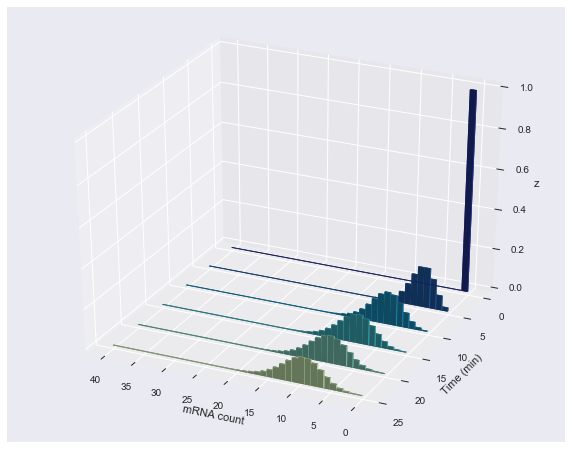

In [21]:
pboc.bar_plot(mRNA, n_slices=6, dy=dt, x_label='mRNA count', y_label='Time (min)')

In [23]:
# Expected location of the mean
r/gamma

10.0